In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [3]:
import torch 
from torch import nn #nn contains all of pytorch's building block to create neural networks 
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu118'

In [4]:
#creating some data 
weight = 0.7 
bias = 0.3 

#create data 
X= torch.arange(0 , 1 , 0.02).unsqueeze(dim = 1)
y = weight * X + bias 

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
#doing train/test split 
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

len(X_test) , len(X_train) , len(y_test) , len(y_train)

(10, 40, 10, 40)

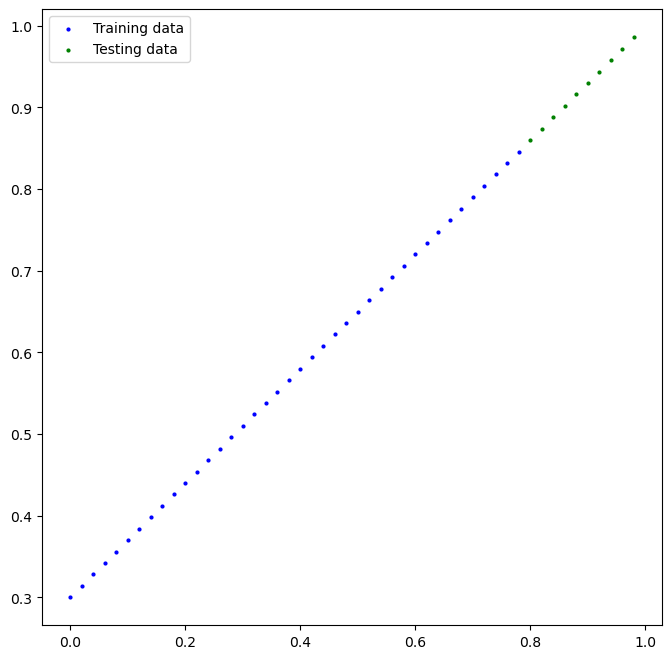

In [6]:

plt.figure(figsize=(8,8))

#plotting training data in blue 
plt.scatter(X_train , y_train , c='b' , s=4 , label = "Training data")

#plotting testing data in green 
plt.scatter(X_test , y_test , c='g' , s = 4 , label = "Testing data")

# if predictions is not None: 
#     plt.scatter(test_data , predictions , c= 'r' , s = 4 , label = "Predictions")

#showing the legend 
plt.legend()

In [28]:
#Building model 
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1 , dtype = torch.float) , 
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1 , dtype = torch.float) , 
                                 requires_grad=True)
        
        #forward propagation
    def forward(self , x: torch.tensor) -> torch.Tensor: 
        return self.weights * x + self.bias

In [29]:
#setting manual seed since nn.Parameter is randomly initialized 
torch.manual_seed(42)

#creating instance of model 
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [30]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [31]:
#To do predictions we can use inference mode
with torch.inference_mode():
    y_pred = model_0(X_test)
    

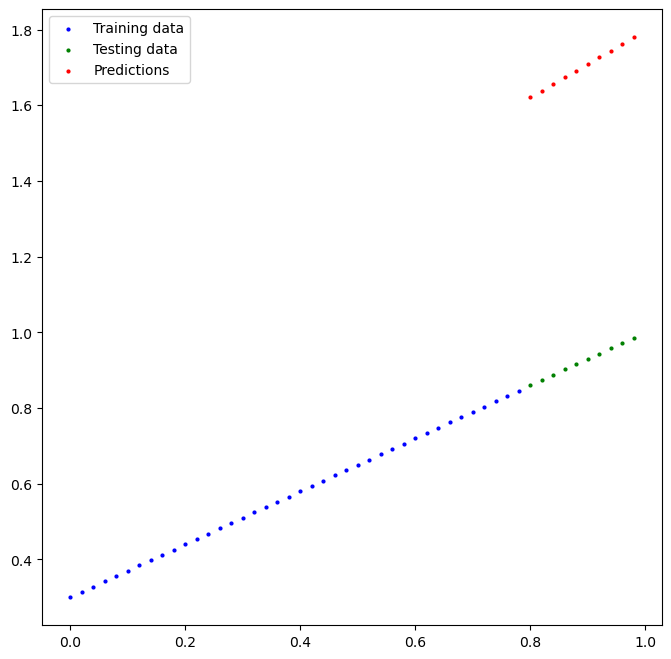

In [32]:

plt.figure(figsize=(8,8))

#plotting training data in blue 
plt.scatter(X_train , y_train , c='b' , s=4 , label = "Training data")

#plotting testing data in green 
plt.scatter(X_test , y_test , c='g' , s = 4 , label = "Testing data")


plt.scatter(X_test , y_pred , c= 'r' , s = 4 , label = "Predictions")

#showing the legend 
plt.legend()

In [33]:
y_test - y_pred

tensor([[-0.7608],
        [-0.7645],
        [-0.7681],
        [-0.7718],
        [-0.7754],
        [-0.7790],
        [-0.7827],
        [-0.7863],
        [-0.7900],
        [-0.7936]])

In [34]:
#creating loss function 
loss_nn = nn.L1Loss() 

optimizer = torch.optim.SGD(params = model_0.parameters() , #parameters to optimize through gradient descent 
                            lr = 0.01)


In [36]:
#training the model with 100 epochs
torch.manual_seed(42)

epochs = 100 

train_loss_list = []
test_loss_list = []
epoch_count = []

for epoch in range(epochs):

    #Putting model on training mode 
    model_0.train()

    # Foward pass on train data using forward() method inside 
    y_pred = model_0(X_train)

    #calculating the loss 
    loss = loss_nn(y_pred , y_train)

    #making grad zero again 
    optimizer.zero_grad()

    #doing backpropagation 
    loss.backward()


    #optimizing step 
    optimizer.step()

    #Testing

    #Putting the model on evaluation mode
    model_0.eval()

    with torch.inference_mode():
        #forward pass on test data 
        test_pred = model_0(X_test)

        #calculating loss 
        test_loss = loss_nn(test_pred , y_test.type(torch.float))

        if epoch % 10 == 0 : 
            epoch_count.append(epoch)
            train_loss_list.append(loss.detach().numpy())
            test_loss_list.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE train loss: {loss} | MAE test loss: {test_loss}")


Epoch: 0 | MAE train loss: 0.6745679974555969 | MAE test loss: 0.7502816915512085
Epoch: 10 | MAE train loss: 0.5593580603599548 | MAE test loss: 0.6155718564987183
Epoch: 20 | MAE train loss: 0.4441482126712799 | MAE test loss: 0.48086196184158325
Epoch: 30 | MAE train loss: 0.328938364982605 | MAE test loss: 0.346152126789093
Epoch: 40 | MAE train loss: 0.21372847259044647 | MAE test loss: 0.21144230663776398
Epoch: 50 | MAE train loss: 0.09851861745119095 | MAE test loss: 0.07673247158527374
Epoch: 60 | MAE train loss: 0.009325616993010044 | MAE test loss: 0.0205828957259655
Epoch: 70 | MAE train loss: 0.005879654549062252 | MAE test loss: 0.012997227720916271
Epoch: 80 | MAE train loss: 0.0024408488534390926 | MAE test loss: 0.004724687431007624
Epoch: 90 | MAE train loss: 0.004425036255270243 | MAE test loss: 0.005930870771408081


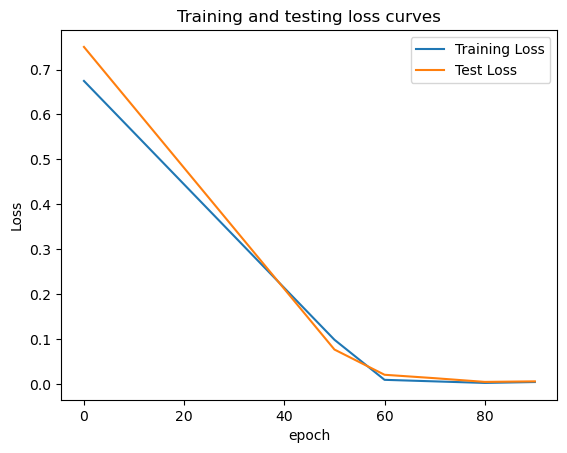

In [37]:
#plot the loss curve
plt.plot(epoch_count , train_loss_list , label = "Training Loss")
plt.plot(epoch_count , test_loss_list , label = "Test Loss")

plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend()


In [38]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6938])), ('bias', tensor([0.2980]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [41]:
#getting the predictions 
with torch.inference_mode():
    y_preds = model_0(X_test)

(y_preds - y_test)

tensor([[-0.0070],
        [-0.0071],
        [-0.0072],
        [-0.0074],
        [-0.0075],
        [-0.0076],
        [-0.0077],
        [-0.0079],
        [-0.0080],
        [-0.0081]])

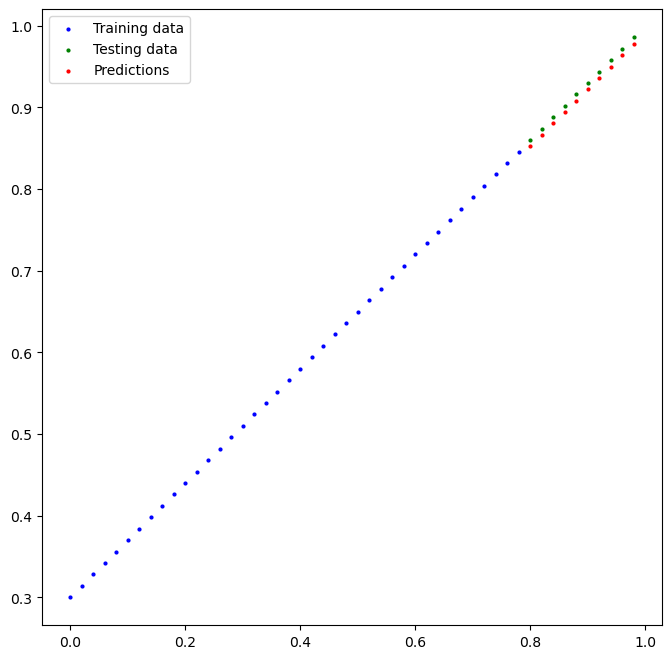

In [42]:
plt.figure(figsize=(8,8))

#plotting training data in blue 
plt.scatter(X_train , y_train , c='b' , s=4 , label = "Training data")

#plotting testing data in green 
plt.scatter(X_test , y_test , c='g' , s = 4 , label = "Testing data")


plt.scatter(X_test , y_preds , c= 'r' , s = 4 , label = "Predictions")

#showing the legend 
plt.legend()

In [43]:
#Saving and loading a Pytorch model
from pathlib import Path 

#Create models Directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True , exist_ok = True)

#Create model save path 
MODEL_NAME = "1stPytorchModel.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME 

In [46]:
#saving the model state dict 
print(f"Savng model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict() , #only saving models learned parameters
           f = MODEL_SAVE_PATH)

Savng model to: models\1stPytorchModel.pth


In [47]:
#Loading a saved model 
#Instantiaiting a model 
loaded_model = LinearRegressionModel()

#loading the state_dict of our saved model 
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [48]:
loaded_model.eval()

with torch.inference_mode():
    loaded_model_pred = loaded_model(X_test)
    

In [49]:
y_preds == loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [50]:
#Doing it in GPU 
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"The device {device} is available")

The device cuda is available


In [51]:
weight = 0.3 
bias = 0.9

X = torch.arange(0 , 1, 0.01).unsqueeze(dim = 1)
y = weight * X + bias 



In [52]:
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(80, 20, 80, 20)

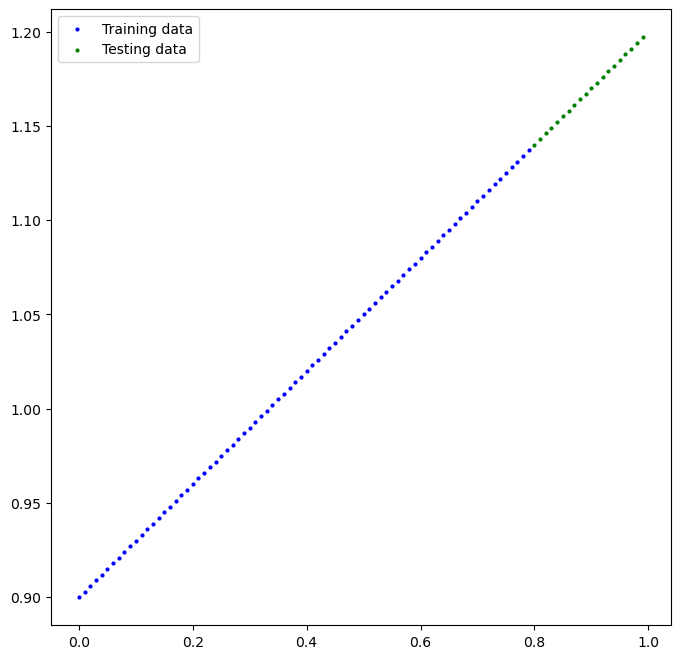

In [53]:
plt.figure(figsize=(8,8))

#plotting training data in blue 
plt.scatter(X_train , y_train , c='b' , s=4 , label = "Training data")

#plotting testing data in green 
plt.scatter(X_test , y_test , c='g' , s = 4 , label = "Testing data")


# plt.scatter(X_test , y_pred , c= 'r' , s = 4 , label = "Predictions")

#showing the legend 
plt.legend()

In [54]:
#Building the model 
class LinearRegressionModel2(nn.Module):
    def __init__(self):
        super().__init__()
        # creating linear layer
        self.linear_layer = nn.Linear(in_features=1 ,
                                       out_features=1)
    def forward(self , x: torch.Tensor):
        return self.linear_layer(x)


In [55]:
torch.manual_seed(42)

model_1 = LinearRegressionModel2()
model_1 , model_1.state_dict()

(LinearRegressionModel2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [59]:
#checking the model device 
next(model_1.parameters()).device , list(model_1.parameters())

(device(type='cpu'),
 [Parameter containing:
  tensor([[0.7645]], requires_grad=True),
  Parameter containing:
  tensor([0.8300], requires_grad=True)])

In [60]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [61]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters() , 
                            lr = 0.01)

In [62]:
torch.manual_seed(42)

#setting number of epochs 
epochs = 2000 

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred , y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    #Testing 
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred , y_test)

    if epoch % 100 == 0 :
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Train loss: 0.1275613158941269 | Test loss: 0.33650314807891846
Epoch: 100 | Train loss: 0.05137667804956436 | Test loss: 0.12079393863677979
Epoch: 200 | Train loss: 0.017119847238063812 | Test loss: 0.03950077295303345
Epoch: 300 | Train loss: 0.007878492586314678 | Test loss: 0.007064235396683216
Epoch: 400 | Train loss: 0.007878492586314678 | Test loss: 0.007064235396683216
Epoch: 500 | Train loss: 0.007878492586314678 | Test loss: 0.007064235396683216
Epoch: 600 | Train loss: 0.007878492586314678 | Test loss: 0.007064235396683216
Epoch: 700 | Train loss: 0.007878492586314678 | Test loss: 0.007064235396683216
Epoch: 800 | Train loss: 0.007878492586314678 | Test loss: 0.007064235396683216
Epoch: 900 | Train loss: 0.007878492586314678 | Test loss: 0.007064235396683216
Epoch: 1000 | Train loss: 0.007878492586314678 | Test loss: 0.007064235396683216
Epoch: 1100 | Train loss: 0.007878492586314678 | Test loss: 0.007064235396683216
Epoch: 1200 | Train loss: 0.007878492586314678

In [63]:
from pprint import pprint 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights ")
print(weight , bias)

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.3028]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8910], device='cuda:0'))])

And the original values for weights 
0.3 0.9


In [65]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[1.1333],
        [1.1363],
        [1.1393],
        [1.1423],
        [1.1454],
        [1.1484],
        [1.1514],
        [1.1545],
        [1.1575],
        [1.1605],
        [1.1635],
        [1.1666],
        [1.1696],
        [1.1726],
        [1.1757],
        [1.1787],
        [1.1817],
        [1.1847],
        [1.1878],
        [1.1908]], device='cuda:0')

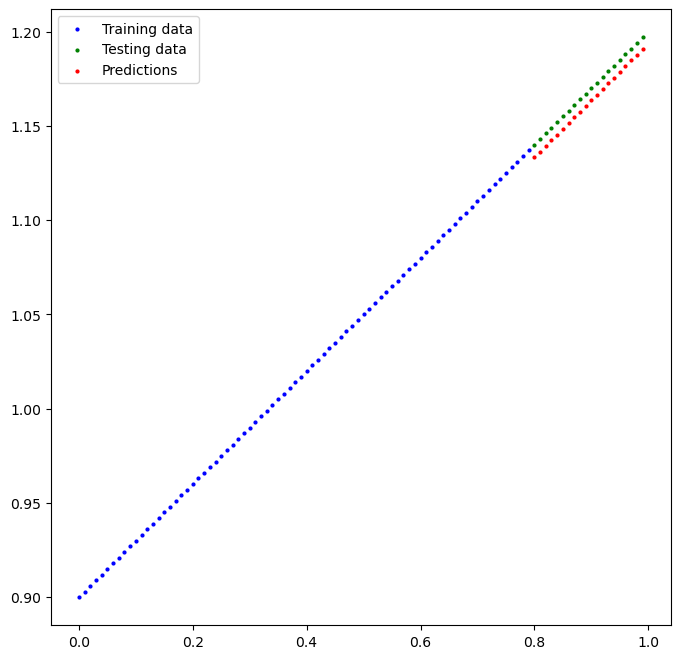

In [68]:
plt.figure(figsize=(8,8))

#plotting training data in blue 
plt.scatter(X_train.to("cpu") , y_train.to("cpu") , c='b' , s=4 , label = "Training data")

#plotting testing data in green 
plt.scatter(X_test.to("cpu") , y_test.to('cpu') , c='g' , s = 4 , label = "Testing data")


plt.scatter(X_test.to('cpu') , y_preds.to("cpu") , c= 'r' , s = 4 , label = "Predictions")

#showing the legend 
plt.legend()